<a href="https://colab.research.google.com/github/bilnazir/stockmarketprediction/blob/main/fyp_GRU_sony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=9bfcbc0b3a4ad633a1a8aa01686c4d31f6715cb70f55f6f089eb62711054340b
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [3]:
 # Module import
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import median_abs_deviation
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from tensorflow.keras.optimizers import Nadam, RMSprop
import pandas_ta as ta
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

In [6]:
df = yf.download(tickers=['SONY'], start='2012-01-01', end='2022-06-20')

df_3 = df.dropna()
df_3

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,18.280001,18.500000,18.280001,18.379999,18.379999,1414800
2012-01-04,18.240000,18.270000,18.139999,18.219999,18.219999,1146400
2012-01-05,17.830000,17.850000,17.600000,17.700001,17.700001,1464900
2012-01-06,17.570000,17.570000,17.370001,17.440001,17.440001,594100
2012-01-09,17.510000,17.510000,17.350000,17.469999,17.469999,529400
...,...,...,...,...,...,...
2022-06-13,85.000000,85.430000,83.550003,83.930000,83.930000,772600
2022-06-14,83.300003,83.470001,81.900002,83.000000,83.000000,931000
2022-06-15,83.220001,85.050003,82.599998,84.339996,84.339996,633600


In [7]:
# Stock indicators for Processing

df_3['RSI']=ta.rsi(df_3.Close, length=15)
df_3['EMAF']=ta.ema(df_3.Close, length=20)
df_3['EMAM']=ta.ema(df_3.Close, length=100)
df_3['EMAS']=ta.ema(df_3.Close, length=150)

df_3['Target'] = df_3['Adj Close']-df_3.Open
df_3['Target'] = df_3['Target'].shift(-1)

df_3['TargetClass'] = [1 if df_3.Target[i]>0 else 0 for i in range(len(df_3))]

df_3['Target Adj Close'] = df_3['Adj Close'].shift(-1)

df_3.dropna(inplace=True)
df_3.reset_index(inplace = True)
df_3.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
df_3


<ipython-input-7-c6e0b158a695>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_3['TargetClass'] = [1 if df_3.Target[i]>0 else 0 for i in range(len(df_3))]


,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,Target Adj Close
0,11.460000,11.640000,11.460000,11.510000,38.879619,12.177784,14.851434,16.593267,0.030000,1,11.670000
1,11.640000,11.740000,11.610000,11.670000,41.082498,12.129424,14.788435,16.528058,0.130000,1,11.710000
2,11.580000,11.740000,11.580000,11.710000,41.645850,12.089479,14.727476,16.464243,0.250000,1,11.980000
3,11.730000,12.010000,11.720000,11.980000,45.420133,12.079052,14.673071,16.404849,0.320000,1,12.340000
4,12.020000,12.400000,11.980000,12.340000,50.036683,12.103904,14.626871,16.351010,0.090000,1,12.210000
...,...,...,...,...,...,...,...,...,...,...,...
2478,88.760002,89.199997,87.629997,88.059998,43.744851,90.342810,96.984252,100.003936,-1.070000,0,83.930000
2479,85.000000,85.430000,83.550003,83.930000,35.655214,89.732067,96.725752,99.791037,-0.300003,0,83.000000
2480,83.300003,83.470001,81.900002,83.000000,34.132338,89.090917,96.453955,99.568639,1.119995,1,84.339996
2481,83.220001,85.050003,82.599998,84.339996,38.206763,88.638449,96.214075,99.366935,-0.699997,0,81.660004


In [8]:
df_4 = df_3.iloc[:, 0:11]
pd.set_option('display.max_columns', None)
df_4.head(10)
df_4

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,Target Adj Close
0,11.460000,11.640000,11.460000,11.510000,38.879619,12.177784,14.851434,16.593267,0.030000,1,11.670000
1,11.640000,11.740000,11.610000,11.670000,41.082498,12.129424,14.788435,16.528058,0.130000,1,11.710000
2,11.580000,11.740000,11.580000,11.710000,41.645850,12.089479,14.727476,16.464243,0.250000,1,11.980000
3,11.730000,12.010000,11.720000,11.980000,45.420133,12.079052,14.673071,16.404849,0.320000,1,12.340000
4,12.020000,12.400000,11.980000,12.340000,50.036683,12.103904,14.626871,16.351010,0.090000,1,12.210000
...,...,...,...,...,...,...,...,...,...,...,...
2478,88.760002,89.199997,87.629997,88.059998,43.744851,90.342810,96.984252,100.003936,-1.070000,0,83.930000
2479,85.000000,85.430000,83.550003,83.930000,35.655214,89.732067,96.725752,99.791037,-0.300003,0,83.000000
2480,83.300003,83.470001,81.900002,83.000000,34.132338,89.090917,96.453955,99.568639,1.119995,1,84.339996
2481,83.220001,85.050003,82.599998,84.339996,38.206763,88.638449,96.214075,99.366935,-0.699997,0,81.660004


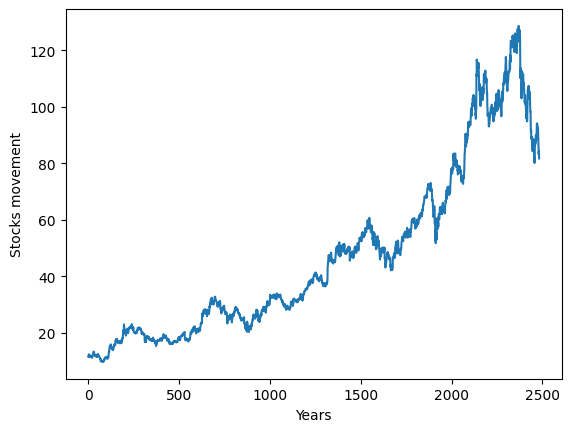

In [9]:
df_4_AC=df_4['Adj Close']
plt.ylabel('Stocks movement')
plt.xlabel('Years')
plt.plot(df_4_AC)

In [10]:
sc = MinMaxScaler(feature_range=(0,1))
df_4_scaled = sc.fit_transform(df_3)
print(df_4_scaled)

[[0.01500484 0.0155595  0.01591713 ... 0.54385981 1.         0.01714862]
 [0.01645692 0.01636569 0.01718039 ... 0.55360643 1.         0.01748487]
 [0.01597289 0.01636569 0.01692774 ... 0.56530232 1.         0.01975454]
 ...
 [0.59454666 0.5946469  0.60914606 ... 0.65009715 1.         0.62802622]
 [0.59390128 0.60738474 0.61504127 ... 0.47271005 0.         0.6054977 ]
 [0.58696355 0.58860046 0.60341926 ... 0.62573143 1.         0.62516814]]


In [11]:
# Multiple feature for data
X = []

backcandles = 40
print(df_4_scaled.shape[0])
for j in range(8):  # Targeted columns 2
    X.append([])
    for i in range(backcandles, df_4_scaled.shape[0]):#backcandles+2
        X[j].append(df_4_scaled[i-backcandles:i, j])

X=np.moveaxis(X, [0], [2])
X, yi =np.array(X), np.array(df_4_scaled[backcandles:,-1]) #scaling backwards
y=np.reshape(yi,(len(yi),1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2483
[[[0.01500484 0.0155595  0.01591713 ... 0.01795844 0.03184725 0.04148055]
  [0.01645692 0.01636569 0.01718039 ... 0.01753715 0.03125554 0.04084086]
  [0.01597289 0.01636569 0.01692774 ... 0.01718918 0.03068298 0.04021483]
  ...
  [0.0190384  0.02015479 0.01937005 ... 0.01858539 0.01805584 0.02402532]
  [0.01823168 0.01741374 0.01751726 ... 0.01812928 0.0177428  0.02362071]
  [0.01823168 0.01821993 0.01878053 ... 0.01783277 0.01746199 0.02323966]]

 [[0.01645692 0.01636569 0.01718039 ... 0.01753715 0.03125554 0.04084086]
  [0.01597289 0.01636569 0.01692774 ... 0.01718918 0.03068298 0.04021483]
  [0.01718296 0.01854241 0.01810679 ... 0.01709835 0.03017197 0.03963218]
  ...
  [0.01823168 0.01741374 0.01751726 ... 0.01812928 0.0177428  0.02362071]
  [0.01823168 0.01821993 0.01878053 ... 0.01783277 0.01746199 0.02323966]
  [0.01855437 0.01821993 0.01869631 ... 0.01757279 0.01718861 0.02286495]]

 [[0.01597289 0.01636569 0.01692774 ... 0.01718918 0.03068298 0.04021483]
  [0.01718296 0.0

In [12]:
# split data into training and testing
train_test_split = int(len(X)*0.7)
print(train_test_split)
X_train, X_test = X[:train_test_split], X[train_test_split:]
y_train, y_test = y[:train_test_split], y[train_test_split:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1710
(1710, 40, 8)
(733, 40, 8)
(1710, 1)
(733, 1)
[[0.01899799]
 [0.01773705]
 [0.01992266]
 ...
 [0.37012442]
 [0.37130128]
 [0.37642906]]


In [13]:
# Define the input shape
input_shape = (backcandles, 8)
input_layer = layers.Input(shape=input_shape, name='Input')

# GRU Layer 1
gru_1 = layers.GRU(units=100, return_sequences=True, activation='tanh',
                   kernel_regularizer=regularizers.l2(0.001), dropout=0.1, recurrent_dropout=0.1)(input_layer)

# Additional GRU Layer
gru_2 = layers.GRU(units=50, return_sequences=False, activation='tanh')(gru_1)

# Dense Layer
dense_1 = layers.Dense(units=50, activation='relu')(gru_2)

# Output Layer
output_layer = layers.Dense(1, activation='linear')(dense_1)


# Create the model
gru_model = models.Model(inputs=input_layer, outputs=output_layer, name='GRU_Model')
gru_model.summary()


Model: "GRU_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 40, 8)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 40, 100)             │          33,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          22,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,401 (228.13 KB)

 Trainable params: 58,401 (228.13 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
gru_model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])


In [15]:
# Train the model
history = gru_model.fit( X_train,
    y_train,
    batch_size=64,
    epochs=128,
    validation_data=(X_test, y_test),
    verbose=1,)

print(history.history.keys)

Epoch 1/128
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - loss: 0.0180 - mean_absolute_error: 0.0417 - val_loss: 0.0181 - val_mean_absolute_error: 0.0734
Epoch 2/128
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - loss: 0.0104 - mean_absolute_error: 0.0211 - val_loss: 0.0225 - val_mean_absolute_error: 0.1121
Epoch 3/128
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0071 - mean_absolute_error: 0.0193 - val_loss: 0.0192 - val_mean_absolute_error: 0.1072
Epoch 4/128
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0049 - mean_absolute_error: 0.0171 - val_loss: 0.0183 - val_mean_absolute_error: 0.1111
Epoch 5/128
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 0.0036 - mean_absolute_error: 0.0153 - val_loss: 0.0169 - val_mean_absolute_error: 0.1089
Epoch 6/128
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0027 - mean_absolute_error: 0.0150 - val_loss: 0.0203 - val_mean_absolute_error: 0.1250
Epoch 7/128
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0021 - mean_absolute_error: 0.01

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
[0.34334245] [0.38222932]
[0.3463069] [0.37760592]
[0.35057056] [0.37970747]
[0.34867224] [0.37886686]
[0.34944504] [0.39904169]
[0.34881517] [0.39702423]
[0.36048198] [0.38853396]
[0.3639578] [0.38122059]
[0.36075667] [0.37004037]
[0.35457352] [0.38138871]


<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

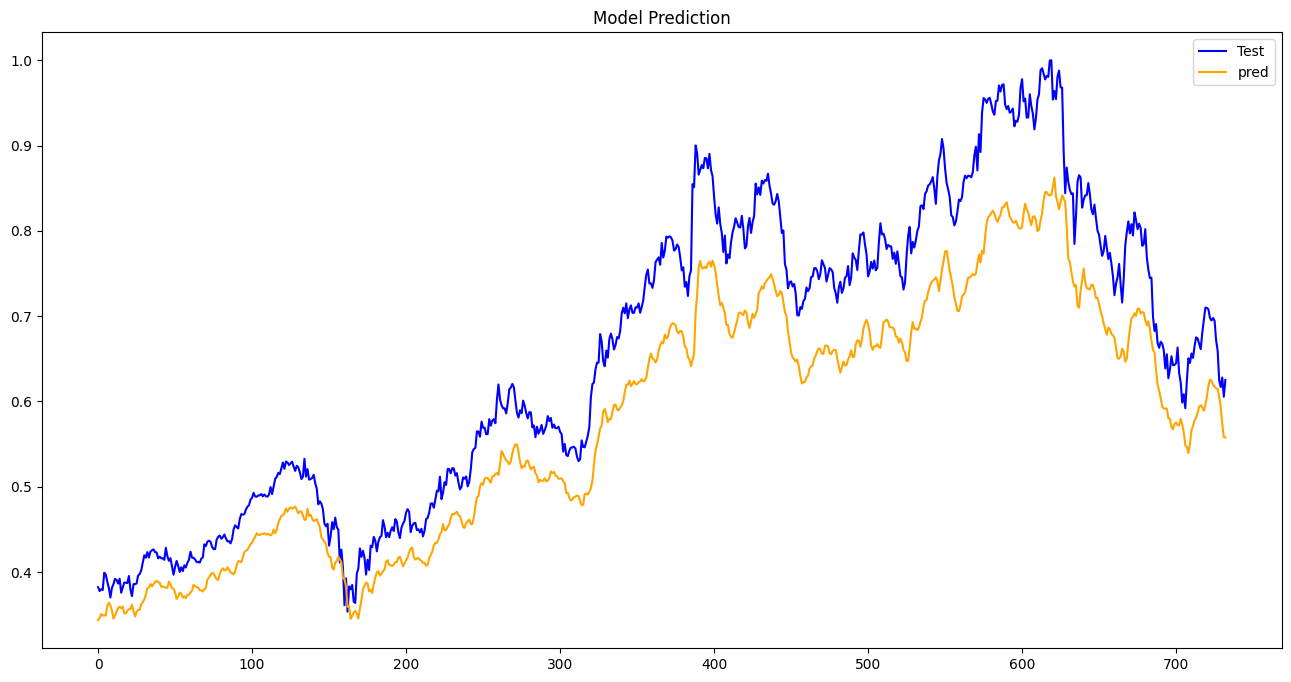

In [16]:
# Make predictions on test data

# Model prediction
y_pred = gru_model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

    plt.figure(figsize=(16,8))


plt.plot(y_test, color = 'blue', label = 'Test')
plt.plot(y_pred, color = 'orange', label = 'pred')
plt.legend(loc=0)
plt.title('Model Prediction')
plt.show()

In [17]:
# Convert training history to datafram for viewing and graphing.
hist = pd.DataFrame(history.history)
hist.head()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0.015308,0.031516,0.018074,0.073361
1,0.009466,0.020489,0.022512,0.112128
2,0.006474,0.018492,0.019156,0.107244
3,0.004557,0.016424,0.018336,0.111141
4,0.003323,0.014571,0.016876,0.108856


In [18]:
# Evaluate the model
loss = gru_model.evaluate(X_test, y_test, verbose=0)[0]  # Extract the loss value from the list
y_pred = gru_model.predict(X_test)
mae = np.mean(np.abs(y_pred - y_test))  # Calculate MAE manually

print(f"Test loss: {loss:.4f}, Test MAE: {mae:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Test loss: 0.0072, Test MAE: 0.0766


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) score: {r2:.4f}")

Mean Absolute Error (MAE): 0.0766
Mean Squared Error (MSE): 0.0072
Root Mean Squared Error (RMSE): 0.0848
R-squared (R2) score: 0.7666


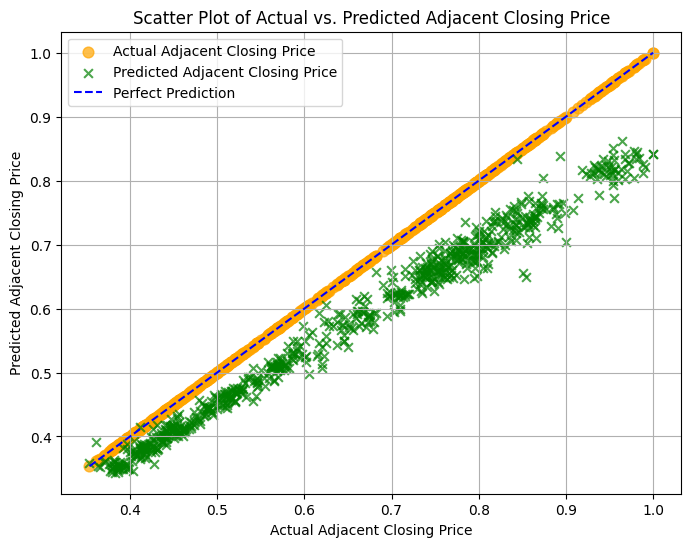

In [20]:
# Scatter plot of actual vs. predicted adjacent closing prices
plt.figure(figsize=(8, 6))  # Increase figure size for better visibility

# Plot actual values as orange circles with larger markers
plt.scatter(y_test, y_test, color='orange', label='Actual Adjacent Closing Price', alpha=0.7, s=60)

# Plot predicted values as black crosses with smaller markers
plt.scatter(y_test, y_pred, color='green', label='Predicted Adjacent Closing Price', alpha=0.7, s=40, marker='x')

# Plot the diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Adjacent Closing Price')
plt.ylabel('Predicted Adjacent Closing Price')
plt.title('Scatter Plot of Actual vs. Predicted Adjacent Closing Price')
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.show()

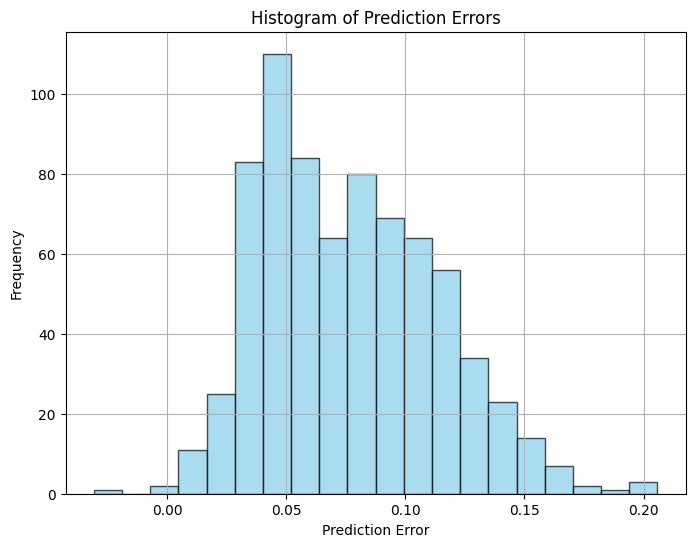

In [21]:
# Histogram of prediction errors
errors = y_test - y_pred

plt.figure(figsize=(8, 6))  # Increase figure size for better visibility

plt.hist(errors, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')

# Add grid lines for better readability
plt.grid(True)

plt.show()